In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
(X_train,y_train),(X_test,y_test) =keras.datasets.mnist.load_data()

In [ ]:
X_test.shape
X_train.shape
y_train.shape
y_test.shape

(10000,)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

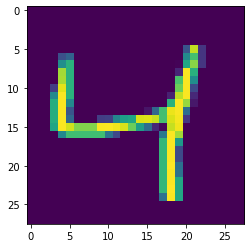

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train[2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='sigmoid'))
model.add(Dense(32,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.001),metrics=['accuracy'])
history =model.fit(X_train,y_train,epochs=24,validation_split=0.3)

Epoch 1/24
1313/1313 [==============================] - 2s 2ms/step - loss: 2.3191 - accuracy: 0.1485 - val_loss: 2.2717 - val_accuracy: 0.3298
Epoch 2/24
1313/1313 [==============================] - 2s 1ms/step - loss: 2.2520 - accuracy: 0.3635 - val_loss: 2.2343 - val_accuracy: 0.4036
Epoch 3/24
1313/1313 [==============================] - 2s 1ms/step - loss: 2.2145 - accuracy: 0.4343 - val_loss: 2.1954 - val_accuracy: 0.4489
Epoch 4/24
1313/1313 [==============================] - 2s 1ms/step - loss: 2.1736 - accuracy: 0.4730 - val_loss: 2.1524 - val_accuracy: 0.5045
Epoch 5/24
1313/1313 [==============================] - 2s 1ms/step - loss: 2.1286 - accuracy: 0.5092 - val_loss: 2.1056 - val_accuracy: 0.5318
Epoch 6/24
1313/1313 [==============================] - 2s 1ms/step - loss: 2.0804 - accuracy: 0.5333 - val_loss: 2.0560 - val_accuracy: 0.5479
Epoch 7/24
1313/1313 [==============================] - 2s 1ms/step - loss: 2.0300 - accuracy: 0.5487 - val_loss: 2.0047 - val_accuracy:

In [ ]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)

313/313 [==============================] - 0s 699us/step


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7134

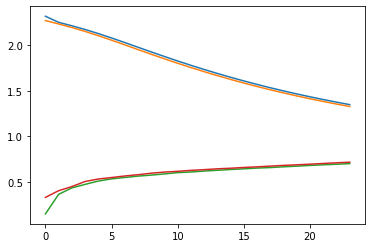

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


1/1 [==============================] - 0s 12ms/step


array([3], dtype=int64)

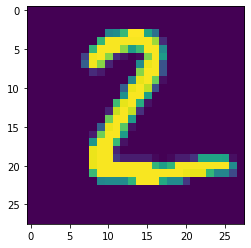

In [ ]:
plt.imshow(X_test[1])
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)